In [2]:
library(dplyr)
library(ggplot2)
library(RColorBrewer)
library(forcats)

In [3]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/scaled_absolute_eff_sizes_20mofas_as_spatial_downsample_50pct_cluster_labels.csv"
df_clusters = read.csv(filename, row.names = 1)

In [4]:
nrow(df_clusters)
head(df_clusters,2)

[1] 212

,label,gene,pp0,pp1,pp2,pp3,pp4,pp5,pp6,pp7,pp8,pp9,pp10,pp11
0,4,ABHD10_-3_111697439_T_G,0,0,0,0,1,0,0,0,0,0,0,0
1,5,ABHD12B_-14_51328222_C_T,0,0,0,0,0,1,0,0,0,0,0,0


In [5]:
for (i in 1:nrow(df_clusters)){
    s = sum(df_clusters[i,3:ncol(df_clusters)])
    if (s!=1){
        print(c(i, s))
    }
}

In [6]:
df0 = data.frame()
for (label in unique(df_clusters$label)){
    df0 = rbind(df0, data.frame(cluster = label, n_genes = nrow(df_clusters[df_clusters$label == label,])))                            
}

In [7]:
df0[order(df0$n_genes, decreasing = T),]

,cluster,n_genes
2,5,43
3,2,41
1,4,39
7,3,18
9,9,15
10,10,13
6,7,12
8,8,10
4,6,9
11,11,8


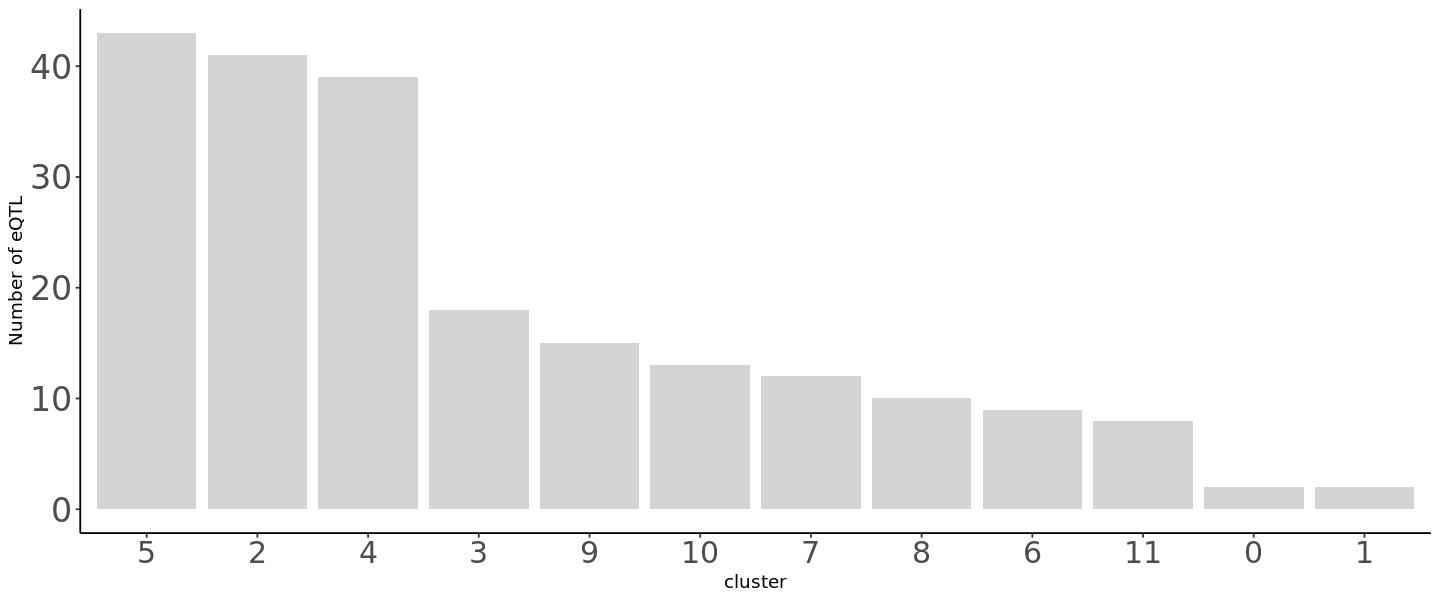

In [18]:
options(repr.plot.width = 12, repr.plot.height = 5)
df0$cluster = as.factor(df0$cluster)
df0 %>%
  mutate(cluster = fct_reorder(cluster, desc(n_genes))) %>%
  ggplot(aes(x=cluster, y=n_genes)) +
    geom_bar(stat="identity", fill = "lightgrey") + 
#     geom_text(aes(label = n_genes), vjust = -0.2, size=6) +
#     geom_text(aes(label=..count..),stat='count',position=position_dodge(0.9),vjust=-0.2) +
    xlab("cluster") + ylab("Number of eQTL") +
    theme_classic() + theme(axis.text.x = element_text(size = 18),axis.text.y = element_text(size = 20))